In [1]:
import tifffile as tf
import scipy.ndimage as ndimage
import numpy as np
import os
import pandas as pd
import glob

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
import scipy.stats as stats
import importlib

In [32]:
src = '../../preproc/norm_ect/results/'

d = 74
TT = 4
founders_filename = src + 'combined_d{}_T{}.csv'.format(d,TT)
founders = pd.read_csv(founders_filename)

d, TT = 158,16
#src = '../../preproc/norm_ect/umap/'
#combined_filename = src + 'kpca_normalized_size_combined_{}_{}_laplacedot_24_founders.csv'.format(d,TT)
combined_filename = src + 'combined_d{}_T{}.csv'.format(d,TT)
#combined_filename = src + 'umap_{}_{}_50_0.1_24_manhattan_unsupervised.csv'.format(d,TT)
combined = pd.read_csv(combined_filename)#, header=None)

print(founders.shape)
print(combined.shape)
founders.head()

(3121, 316)
(3121, 2548)


,Scan,Color,Generation,Selection,Progeny,Label (C-G-S-P),Founder,Label,Tag,Length,...,4591,4607,4623,4639,4655,4671,4687,4703,4719,4735
0,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_10_0,82.15945,...,1,1,3,1,1,1,-7,2,1,1
1,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_24_0,77.96905,...,1,1,-4,0,1,1,0,1,1,1
2,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_20_0,73.92173,...,1,1,1,1,1,1,-6,1,1,1
3,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_11_0,79.44825,...,1,1,0,1,1,1,1,1,1,1
4,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_9_0,81.29421,...,1,1,-6,1,1,1,3,0,1,1


In [ ]:
combined.head()

In [3]:
combined.rename(columns=dict(zip(combined.columns.values[11:], 'KPCA ' + combined.columns.values[11:])), inplace=True)
#combined.rename(columns=dict(zip(combined.columns.values, 'UMAP ' + ((combined.columns.values + 1).astype(str)).astype('O'))), inplace=True)

In [4]:
combined = pd.concat([pd.DataFrame(combined.iloc[0, :]).T, combined.iloc[4:, :]])
founders = pd.concat([pd.DataFrame(founders.iloc[0, :]).T, founders.iloc[4:, :]])

In [5]:
founders_names_original = np.unique(founders.Founder.values)

founders_names = founders_names_original.copy()
founders_names[4] = 'CA Mariout'
founders_names[10] = 'Good Delta'
founders_names[16] = 'Maison Carree'
founders_names[23] = 'Palmella Blue'
founders_names[27] = 'WI Winter'

print(founders_names)

['Algerian' 'Alpha' 'Arequipa' 'Atlas' 'CA Mariout' 'Club Mariout'
 'Everest' 'Flynn' 'Glabron' 'Golden Pheasant' 'Good Delta' 'Han River'
 'Hannchen' 'Horn' 'Lion' 'Lyallpur' 'Maison Carree' 'Manchuria' 'Meloy'
 'Minia' 'Multan' 'Oderbrucker' 'Orel' 'Palmella Blue' 'Sandrel' 'Trebi'
 'White Smyrna' 'WI Winter']


In [6]:
meta_info = np.s_[:,:9]
trad_traits = np.s_[:, 9:20]
topo_traits = np.s_[:, 20:]

In [8]:
mixed = pd.concat([founders.iloc[meta_info], combined], axis=1)
#mixed = pd.concat([founders.iloc[meta_info], founders.iloc[trad_traits], combined], axis=1)
mixed_traits = np.s_[:,9:]
mixed.iloc[mixed_traits] = (mixed.iloc[mixed_traits] - mixed.iloc[mixed_traits].mean(axis=0))/mixed.iloc[mixed_traits].std(axis=0)
print(mixed.shape)
mixed.head()

(3118, 44)


,Scan,Color,Generation,Selection,Progeny,Label (C-G-S-P),Founder,Label,Tag,Length,...,KPCA 15,KPCA 16,KPCA 17,KPCA 18,KPCA 19,KPCA 20,KPCA 21,KPCA 22,KPCA 23,KPCA 24
0,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_10_0,0.332429,...,-0.000008,-0.000015,-0.000012,-0.000005,-0.000003,0.000019,0.000015,-6.528366e-07,-0.002894,0.000009
4,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_9_0,0.239693,...,0.035298,-0.180632,-0.145916,0.116764,0.228066,0.143150,-0.020898,6.254247e-02,5.224935,0.144045
5,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_5_0,0.468562,...,-0.073697,-0.125906,-0.133382,-0.033952,0.031790,0.188801,0.109196,-7.553848e-02,-9.402512,0.058388
6,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_6_0,0.706687,...,-0.143637,-0.108857,-0.052729,0.041189,-0.147892,0.095598,-0.131802,-1.107750e-01,2.509486,-0.005531
7,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_2_0,0.791067,...,-0.112798,-0.049075,-0.078709,0.003614,0.104851,0.009572,-0.047257,-4.312249e-02,-0.493689,0.024481


In [9]:
cols = list(mixed.columns)
a, b = cols.index('KPCA 3'), cols.index('KPCA 19')
cols[b], cols[a] = cols[a], cols[b]
mixed = mixed[cols]
mixed.rename(columns = {'KPCA 3': 'KPCA 19', 'KPCA 19': 'KPCA 3'}, inplace=True)
mixed.iloc[mixed_traits].head()

,Length,Width,Height,HeightMax,Shell,Area,Vol,ConvexArea,ConvexVol,ConvexAreaRatio,...,KPCA 15,KPCA 16,KPCA 17,KPCA 18,KPCA 19,KPCA 20,KPCA 21,KPCA 22,KPCA 23,KPCA 24
0,0.332429,2.087606,1.343376,1.533854,1.251627,1.086491,1.322356,1.167189,1.377237,-0.539795,...,-0.000008,-0.000015,-0.000012,-0.000005,0.000013,0.000019,0.000015,-6.528366e-07,-0.002894,0.000009
4,0.239693,1.976142,1.700509,2.070353,1.068743,1.169546,1.305303,1.094084,1.340622,0.841740,...,0.035298,-0.180632,-0.145916,0.116764,0.277400,0.143150,-0.020898,6.254247e-02,5.224935,0.144045
5,0.468562,1.254879,1.697102,1.889463,1.358082,1.090494,1.566161,1.225639,1.516425,-1.005680,...,-0.073697,-0.125906,-0.133382,-0.033952,0.140933,0.188801,0.109196,-7.553848e-02,-9.402512,0.058388
6,0.706687,1.053001,1.282099,1.756586,1.379009,1.187558,1.553751,1.254246,1.503766,-0.399143,...,-0.143637,-0.108857,-0.052729,0.041189,0.171392,0.095598,-0.131802,-1.107750e-01,2.509486,-0.005531
7,0.791067,1.011705,1.396162,1.805292,1.428142,1.366677,1.671854,1.373238,1.620901,0.140091,...,-0.112798,-0.049075,-0.078709,0.003614,0.007951,0.009572,-0.047257,-4.312249e-02,-0.493689,0.024481


In [10]:
def anova(data, traits_ss, colname):
    col_names = np.unique(data[colname].values)
    traits = data.iloc[traits_ss].columns
    l_anova = [None for i in range(len(col_names))]
    
    f_oneway = np.column_stack((np.zeros(len(traits)), np.ones(len(traits))))
    kruskal = np.copy(f_oneway)
    alexander = np.copy(f_oneway)
    
    for j in range(len(traits)):
        for i in range(len(l_anova)):
            line = col_names[i]
            l_anova[i] = data.loc[data[colname] == line, traits[j]].values

        if not np.all([np.all(l_anova[i] == l_anova[i][0]) for i in range(len(l_anova))]):

            foo = stats.f_oneway(*l_anova)
            f_oneway[j, :] = foo.statistic, foo.pvalue

            foo = stats.kruskal(*l_anova)
            kruskal[j, :] = foo.statistic, foo.pvalue

            foo = stats.alexandergovern(*l_anova)
            alexander[j, :] = foo.statistic, foo.pvalue
    
    return f_oneway, kruskal, alexander

In [ ]:
f_oneway, kruskal, alexander = anova(combined, trad_traits, founders_names_original)

In [36]:
colname = 'Founder'
#colname = 'Label (C-G-S-P)'
f_oneway, kruskal, alexander = anova(combined, topo_traits, colname)
#f_oneway, kruskal, alexander = anova(combined, topo_traits, 'Label (C-G-S-P)')

In [24]:
colname = 'Founder'
#colname = 'Label (C-G-S-P)'
f_oneway, kruskal, alexander = anova(mixed, mixed_traits, colname)

In [37]:
alexander[:,0] = np.nan_to_num(alexander[:,0], nan=0)
alexander[:,1] = np.nan_to_num(alexander[:,1], nan=1)

if colname == 'Founder':
    marker = 'accession'
elif colname == 'Label (C-G-S-P)':
    marker = 'spike'
print('marker:\t', marker)

marker:	 accession


In [38]:
dst = '../../preproc/norm_ect/umap/combined_{}_d{}_T{}_'.format(marker, d,TT)

np.savetxt(dst + 'f_oneway.csv', f_oneway, delimiter=',')
np.savetxt(dst + 'kruskal.csv', kruskal, delimiter=',')
np.savetxt(dst + 'alexander.csv', alexander, delimiter=',')

# If ANOVA computed already

In [ ]:
d,TT = 158, 16
marker = 'accession'
src = '../../preproc/norm_ect/umap/combined_{}_d{}_T{}_'.format(marker, d,TT)

f_oneway = np.loadtxt(src + 'f_oneway.csv', delimiter=',')
kruskal = np.loadtxt(src + 'kruskal.csv',  delimiter=',')
alexander = np.loadtxt(src + 'alexander.csv', delimiter=',')

In [14]:
def correct_zero(arr):
    minval = np.min(arr[np.nonzero(arr[:,1])[0], 1])
    arr[arr[:,1] == 0, 1] = minval
    return arr

In [26]:
correct_zero(f_oneway)
correct_zero(kruskal)
alexander = correct_zero(alexander)

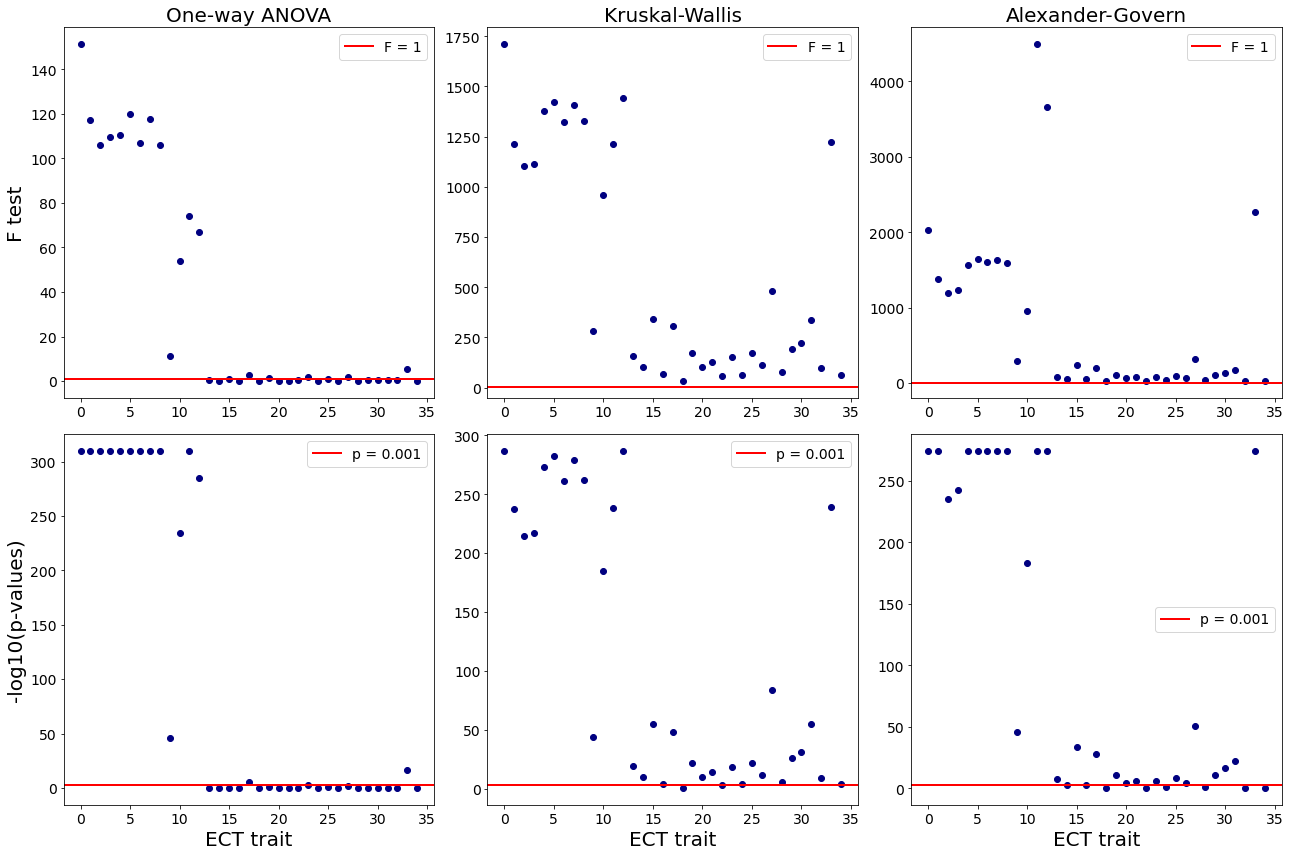

In [27]:
fig, ax = plt.subplots(2,3, figsize=(18,12))
xvals = range(len(f_oneway))
fs = 20

i = (0,0)
ax[i].scatter(xvals, f_oneway[:,0], c='navy')
ax[i].axhline(y=1, c='red', lw=2, label='F = 1');
ax[i].set_title('One-way ANOVA', fontsize=fs)
ax[i].set_ylabel('F test', fontsize=fs);
ax[i].legend(fontsize=fs-6)
ax[i].tick_params(labelsize=fs-6)

i = (0,1)
ax[i].scatter(xvals, kruskal[:,0], c='navy')
ax[i].axhline(y=1, c='red', lw=2, label='F = 1');
ax[i].set_title('Kruskal-Wallis', fontsize=fs)
ax[i].legend(fontsize=fs-6)
ax[i].tick_params(labelsize=fs-6)

i = (0,2)
ax[i].scatter(xvals, alexander[:,0], c='navy')
ax[i].axhline(y=1, c='red', lw=2, label='F = 1')
ax[i].legend(fontsize=fs-6)
ax[i].set_title('Alexander-Govern', fontsize=fs)
ax[i].tick_params(labelsize=fs-6)

i = (1,0)
ax[i].scatter(xvals, -1*np.log10(f_oneway[:,1]), c='navy')
ax[i].axhline(y=-np.log10(0.001), c='red', lw=2, label='p = 0.001');
ax[i].legend(fontsize=fs-6)
ax[i].set_ylabel('-log10(p-values)', fontsize=fs);
ax[i].set_xlabel('ECT trait', fontsize=fs)
ax[i].tick_params(labelsize=fs-6)

i = (1,1)
ax[i].scatter(xvals, -1*np.log10(kruskal[:,1]), c='navy')
ax[i].axhline(y=-np.log10(0.001), c='red', lw=2, label='p = 0.001');
ax[i].legend(fontsize=fs-6)
ax[i].set_xlabel('ECT trait', fontsize=fs)
ax[i].tick_params(labelsize=fs-6)

i = (1,2)
ax[i].scatter(xvals, -1*np.log10(alexander[:,1]), c='navy')
ax[i].axhline(y=-np.log10(0.001), c='red', lw=2, label='p = 0.001');
ax[i].legend(fontsize=fs-6)
ax[i].set_xlabel('ECT trait', fontsize=fs)
ax[i].tick_params(labelsize=fs-6)

plt.tight_layout()

#filename = dst + 'ECT_ANOVA.jpg'
#plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

In [28]:
fdirs = np.argsort(f_oneway[:,0])
kdirs = np.argsort(kruskal[:,0])
adirs = np.argsort(alexander[:,0])

In [18]:
print('OneWay ANOVA\t\tKruskal-Wallis\t\tAlexander-Govern')
print('----------------------------------------------------------------')
print('dir\tpvalue  \tdir\tpvalue  \tdir\tpvalue')
print('')
for i in range(1,12):
    print('{}\t{:.2e}\t{}\t{:.2e}\t{}\t{:.2e}'.format(fdirs[-i], f_oneway[fdirs[-i],1], kdirs[-i], kruskal[kdirs[-i],1], adirs[-i], alexander[adirs[-i],1]))

OneWay ANOVA		Kruskal-Wallis		Alexander-Govern
----------------------------------------------------------------
dir	pvalue  	dir	pvalue  	dir	pvalue

11	2.75e-308	11	4.98e-309	11	2.16e-241
12	2.75e-308	12	4.98e-309	12	2.16e-241
2	2.75e-308	33	4.98e-309	33	2.16e-241
3	2.75e-308	2	4.98e-309	6	2.16e-241
1	2.75e-308	3	4.98e-309	2	2.16e-241
0	2.75e-308	0	4.98e-309	3	2.16e-241
6	2.75e-308	5	4.98e-309	8	2.16e-241
5	2.75e-308	6	2.11e-308	0	2.16e-241
8	2.75e-308	8	6.03e-305	1	2.16e-241
7	2.75e-308	7	7.71e-304	5	2.16e-241
4	2.75e-308	1	5.95e-298	7	2.16e-241


## Focus on Kruskal-Wallis, since it doesn't require any distribution assumptions

### Benjamini-Hochberg FDR correction

In [19]:
def benjamini_hochberg(statistic, Q=1e-7):
    argpvals = np.lexsort((-statistic[:,0], statistic[:,1]))
    
    bh_thr = np.arange(1,1+len(argpvals))*Q/len(argpvals)
    bh_critical = np.max(np.nonzero(statistic[argpvals,1] < bh_thr)[0])
    
    return bh_critical

In [20]:
def plot_bh_summary(statistic, bh_critical, ticklabels=None, xlab='xlab', title='title', savefig=False, filename='file.jpg'):
    argpvals = np.lexsort((-statistic[:,0], statistic[:,1]))
    fig, ax = plt.subplots(2,1,figsize=(12,8))
    fs = 22

    x = np.linspace(1e-35, len(argpvals)-1,1000)
    i=1
    ax[i].scatter(np.arange(len(argpvals))+1, statistic[argpvals,0])
    ax[i].axhline(y=statistic[argpvals[bh_critical],0], alpha=0.5, c='red', label='H-statistic corresponding to BH critical p-value')
    ax[i].set_ylabel('H-statistic', fontsize=fs)
    ax[i].legend(fontsize=fs-5)

    i=0
    ax[i].plot(x, -np.log10(x*Q/len(argpvals)), lw=2, c='red', alpha=0.5, label='BH correction for {:.1e} FDR'.format(Q))
    ax[i].scatter(np.arange(len(argpvals)), -np.log10(statistic[argpvals,1]))
    ax[i].set_ylabel('-log10(p-value)', fontsize=fs)
    ax[i].legend(fontsize=fs-5)
    
    #plt.title('Krukal-Wallis p-values'.format(Q), fontsize=fs);
    
    ax[0].tick_params('x', labelbottom=False)
    ax[0].tick_params(labelsize=fs-2)
    ax[1].tick_params(labelsize=fs-2)
    
    if ticklabels is not None:
        ax[0].set_xticks(np.arange(len(argpvals)))
    
        ax[1].set_xticks(np.arange(len(argpvals)) + 1)
        ax[1].set_xticklabels(ticklabels)
        ax[1].tick_params('x', labelrotation=90, labelsize=fs-2)
    
    ax[1].set_xlabel(xlab, fontsize=fs)
    plt.suptitle(title, fontsize=fs+5)
    plt.tight_layout()
    
    if savefig:
        plt.savefig(filename + '.jpg', format='jpg', dpi=150, bbox_inches='tight', pil_kwargs={'optimize':True})
        plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

In [29]:
Q = 1e-10
kbh_critical = benjamini_hochberg(kruskal, Q)
abh_critical = benjamini_hochberg(alexander, Q)
fbh_critical = benjamini_hochberg(f_oneway, Q)
print(kbh_critical, abh_critical, fbh_critical, sep='\t')

27	20	13


In [30]:
#traits = combined.iloc[topo_traits].columns.values.copy()
traits = mixed.iloc[mixed_traits].columns.values.copy()
traits[2] = 'HeightA';traits[3] = 'HeightB'
print(traits)
traits[kdirs[::-1]]

['Length' 'Width' 'HeightA' 'HeightB' 'Shell' 'Area' 'Vol' 'ConvexArea'
 'ConvexVol' 'ConvexAreaRatio' 'ConvexVolRatio' 'KPCA 1' 'KPCA 2' 'KPCA 3'
 'KPCA 4' 'KPCA 5' 'KPCA 6' 'KPCA 7' 'KPCA 8' 'KPCA 9' 'KPCA 10' 'KPCA 11'
 'KPCA 12' 'KPCA 13' 'KPCA 14' 'KPCA 15' 'KPCA 16' 'KPCA 17' 'KPCA 18'
 'KPCA 19' 'KPCA 20' 'KPCA 21' 'KPCA 22' 'KPCA 23' 'KPCA 24']


array(['Length', 'KPCA 2', 'Area', 'ConvexArea', 'Shell', 'ConvexVol',
       'Vol', 'KPCA 23', 'KPCA 1', 'Width', 'HeightB', 'HeightA',
       'ConvexVolRatio', 'KPCA 17', 'KPCA 5', 'KPCA 21', 'KPCA 7',
       'ConvexAreaRatio', 'KPCA 20', 'KPCA 19', 'KPCA 15', 'KPCA 9',
       'KPCA 3', 'KPCA 13', 'KPCA 11', 'KPCA 16', 'KPCA 4', 'KPCA 10',
       'KPCA 22', 'KPCA 18', 'KPCA 6', 'KPCA 14', 'KPCA 24', 'KPCA 12',
       'KPCA 8'], dtype=object)

../../preproc/temp/seeds/kruskal_wallis_accession_combined_d158_T16_kpca_summary


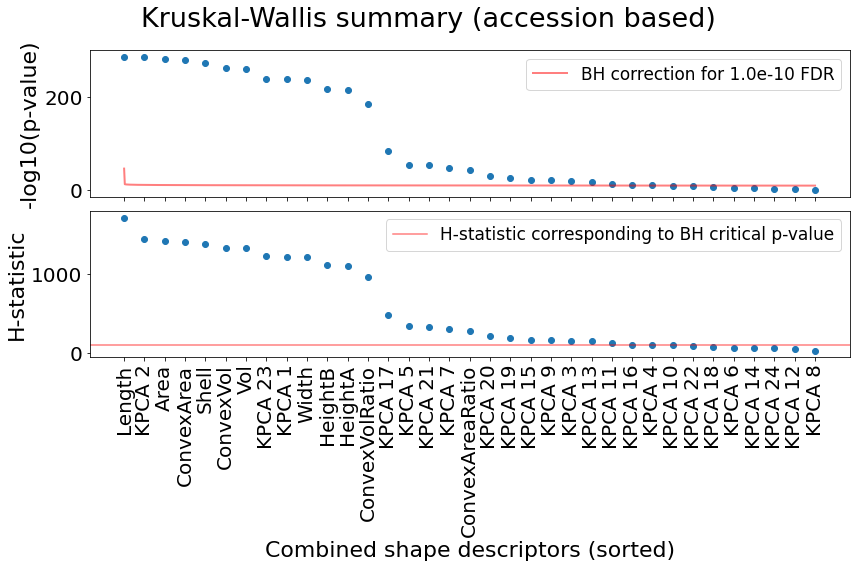

In [31]:
info_type = 'Combined'
savefig = True
dst = '../../preproc/temp/seeds/'
#filename = dst + 'kruskal_wallis_{}_{}_d{}_T{}_summary.jpg'.format(marker,'_'.join(info_type.split(' ')).lower(),d,TT)
filename = dst + 'kruskal_wallis_{}_{}_d{}_T{}_kpca_summary'.format(marker,'_'.join(info_type.split(' ')).lower(),d,TT)
print(filename)

plot_bh_summary(kruskal, kbh_critical,
                traits[kdirs[::-1]],
                xlab ='{} shape descriptors (sorted)'.format(info_type), 
                title = 'Kruskal-Wallis summary ({} based)'.format(marker),
                savefig = savefig, 
                filename = filename)

In [ ]:
filename = dst + 'alexander_govern_{}_{}_summary.jpg'.format(marker,'_'.join(info_type.split(' ')).lower())
print(filename)

plot_bh_summary(alexander, abh_critical,
                #traits[adirs[::-1]],
                xlab ='{} shape descriptors (sorted)'.format(info_type), 
                title = 'Alexander-Govern summary ({} based)'.format(marker),
                savefig = savefig, 
                filename = filename)

In [ ]:
filename = dst + 'oneway_anova_{}_{}_summary.jpg'.format(marker,'_'.join(info_type.split(' ')).lower())
print(filename)

plot_bh_summary(f_oneway, fbh_critical,
                #traits[adirs[::-1]],
                xlab ='{} shape descriptors (sorted)'.format(info_type), 
                title = 'One-way ANOVA summary ({} based)'.format(marker),
                savefig = savefig, 
                filename = filename)

In [ ]:
import demeter.directions as dirss

In [ ]:
parallels = 7
meridians = 12
pdirections = dirss.pole_directions(parallels,meridians,x=1,y=0,z=2)

In [ ]:
def plot_pole_directions(directions, titleplot = 'title', parallels=8, meridians=12, fontsize=40, save_fig=False, filename = 'sphere'):

    pdirections = dirss.pole_directions(parallels,meridians,x=1,y=0,z=2)
    viridis = cm.get_cmap('viridis', parallels*2-1)
    opacity = np.linspace(0.25,0.9,parallels*2-1)

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')

    axlen = np.linspace(np.min(directions), np.max(directions), 50)
    zeros = np.repeat(0,len(axlen))

    ax.plot(axlen, zeros, zeros, c='r', lw=4, alpha=0.5)
    ax.plot(zeros, axlen, zeros, c='b', lw=4, alpha=0.5)
    ax.plot(zeros, zeros, axlen, c='g', lw=4, alpha=0.5)
    ax.scatter(directions[:,0],directions[:,1],directions[:,2], marker='^', s=160, c='m')

    for i in range(parallels*2-1):
        ax.plot(pdirections[(i*meridians + 1):((i+1)*meridians + 1),0],
                pdirections[(i*meridians + 1):((i+1)*meridians + 1),1],
                pdirections[(i*meridians + 1):((i+1)*meridians + 1),2],
                c=viridis.colors[i,:3],
                alpha = opacity[i],
                lw = 2.5)
        ax.plot(pdirections[np.array((i*meridians + 1,(i+1)*meridians)),0],
                pdirections[np.array((i*meridians + 1,(i+1)*meridians)),1],
                pdirections[np.array((i*meridians + 1,(i+1)*meridians)),2],
                c=viridis.colors[i,:3],
                alpha = opacity[i],
                lw = 2.5)

    fig.set_facecolor('white')
    ax.set_facecolor('white')
    ax.grid(False)
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.set_axis_off()
    #ax.set_xlabel('X Axis', fontsize=24)
    #ax.set_ylabel('Y Axis', fontsize=24)
    #ax.set_zlabel('Z Axis', fontsize=24)
    ax.set_title(titleplot,fontsize=fontsize, pad=0, y=0.83);
    #plt.margins(0.99)
    #ax = plt.gca()
    #ax.set_xlim(0.0, 1.0);
    #ax.set_ylim(1.0, 0.0);

    if save_fig:
        plt.savefig(filename+'.jpg', bbox_inches='tight',
                    dpi=72, format='jpg', pil_kwargs={'optimize':True});
        plt.savefig(filename+'.pdf', dpi=72,
                    bbox_inches='tight', format='pdf');

In [ ]:
dirs = kdirs[ : :-1][:kbh_critical]
hvalues = kruskal[:,0]
pvalues = kruskal[:,1]
dindex = dirs//TT
dthold = dirs%TT
for i in range(len(dindex)):
    vals = [dirs[i], hvalues[i], pvalues[i], dindex[i], dthold[i], *pdirections[dindex[i],]]
    print('{}\t{:.2f}\t{:.2e}\t->\t{}\t{}\t{:.3f}\t{:.3f}\t{:.3f}'.format(*vals))

In [ ]:
#len(kdirs)//TT == len(pdirections)

filename = dst + 'discerning_{}_directions_{:.0e}FDR_d{}_T{}'.format(marker,Q,d,TT)
print(filename)
plot_pole_directions(pdirections[dindex,:],
                    'Discerning directions\n{}-wise\n(Adjusted {:.0e} FDR)'.format(marker,Q),
                    parallels,
                    meridians,
                    fontsize=25,
                    save_fig = True,
                    filename = filename)

In [ ]:
filename = dst + 'relevant_directions_{}_{:.0e}_d{}_T{}.csv'.format(marker, Q, d, TT)
np.savetxt(filename, np.column_stack((dindex,dthold, pdirections[dindex,:])), delimiter=',')

In [ ]:
dst

In [ ]:
mix = mixed.iloc[mixed_traits].values
mu, sigma = 0,1
fig, ax = plt.subplots(7,5, figsize=(16,21))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        lmit = 4
        b = 30
        idx = i*ax.shape[1] + j
        vals = mix[:, idx]
        if idx > 10:
            lmit = 1
            b = 50
            vals = vals[np.abs(vals) < lmit]
        count, bins, ignored = ax[i,j].hist(vals, bins=b, density=True, range=(-lmit, lmit))
        ax[i,j].plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ), lw=4)
        ax[i,j].set_title(traits[idx], fontsize=fs)
        ax[i,j].set_xlim(-lmit, lmit)
fig.tight_layout()

filename = dst + 'trait_distribution_vert.jpg'
plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

In [ ]:
filename = dst + 'ECT_ANOVA.jpg'
filename
#plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

In [ ]:
hist, bins = np.histogram(vals, bins=30, range=(-1,1), density=False)
hist/len(vals)

In [ ]:
j = 3
for i in range(len(founders_names)):
    line = founders_names_original[i]
    vals = founders.loc[founders.Founder == line, trad_dirs[j]].values
    
    sd = np.std(vals)
    mean = np.mean(vals)
    foo = sd/mean
    print('{}\t{:.2e}\t{:.2e}\t{:.3f}'.format(line,sd,mean,foo),sep='\t')